# Introduction

In this lab, we explore the effects of Coulomb’s law, which models the force
generated between two charged particles. We will look at how similar charges
affect each other, specifically how the force applied to each is impacted by the
distance between the two. Understanding this law can help in predicting the
interactions between electronic devices emitting EM fields, which may interfere
with one another's functions if brought too close, such as bringing a magnet too
close to a laptop screen.

Materials: High voltage power supply, Coulomb balance, marker.

# Problem 1

Procedure: Draw out a list of each combination of charges, being either
positive, negative or neutral. Apply each charge to the spheres and bring them
close, take note of the forces applied. Ground each sphere and move to the next
combination. Repeat until each combination has been tested.

![All Combinations](problem-1.jpg)

# Problem 2

Procedure: Slowly bring the voltage up to 6kV. Ground each of the spheres.
Charge up each sphere to 6kV. Slowly bring them closer together. Observe what
happens. Repeat the process with one sphere at 6kV and one at 1kV.

Results: When the spheres are far away from each other, they don’t affect each
other. When brought close to each other, they repelled. When they were both
charged to 6kV, they had a higher angle than with the 1kV and 6kV. The spheres
start to repel more as they get closer to each other. There was no visible
movement when they were as far away from each other.

Analysis: This means that the forces between them are proportional to their
distance from each other. Also, this says that the higher the difference in
potential, the higher the forces on them. They could repel each other because
they are the same charge and the same charges repel each other.

# Problem 3

Procedure: Ground both of the spheres. Bring the power supply up to 6kV slowly.
Charge each sphere by touching the hot wire to each. Slowly bring the spheres
together and measure the distance and angle every centimeter. Continue until you
reach 0 cm away from each other. Repeat these steps but start with the spheres
close and bring them away.

Data:

| Dist. | Ang. 1 | Ang. 2 | Dist. | Ang. 1 | Ang. 2 |
|-------|--------|--------|-------|--------|--------|
| 0     | 97     | -      | ...   | ...    | ...    |
| 1     | 77     | 82     | 18    | 7      | 4      |
| 2     | 59     | 63     | 19    | 7      | 4      |
| 3     | 47     | 49     | 20    | 6      | 3      |
| 4     | 39     | 39     | 21    | 6      | 3      |
| 5     | 32     | 31     | 22    | 5      | 2      |
| 6     | 26     | 26     | 23    | 5      | 2      |
| 7     | 23     | 21     | 24    | 5      | 2      |
| 8     | 19     | 18     | 25    | 5      | 2      |
| 9     | 18     | 15     | 26    | 4      | 2      |
| 10    | 16     | 12     | 27    | 4      | 2      |
| 11    | 14     | 12     | 28    | 4      | 1      |
| 12    | 12     | 10     | 29    | 4      | 1      |
| 13    | 12     | 9      | 30    | 4      | 1      |
| 14    | 10     | 7      | 31    | 3      | 1      |
| 15    | 10     | 6      | 32    | 3      | 1      |
| 16    | 9      | 5      | 33    | 3      | 0      |
| 17    | 8      | 4      | 34    | -      | 0      |



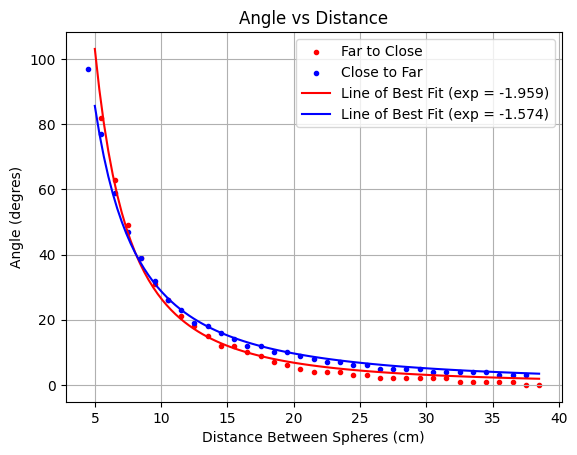

In [1]:
from math import *

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Distances (cm)
dist_1 = np.arange(34, 0, -1)
dist_2 = np.arange(0, 34, 1)

# To account for the measurement distance not being between the centers of the spheres
adjust = 4.5 # cm

dist_1 = dist_1 + adjust
dist_2 = dist_2 + adjust

comp_dist = np.linspace(5, 34+adjust, 100)
comp = lambda x: (1 / (4 * pi * 8.8541 * (10**-12))) * 2 * charge / x**2

# Trial angle data (1: far to close, 2: close to far) (angle)
angle_1 = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7, 9, 10, 12, 12, 15, 18, 21, 26, 31, 39, 49, 63, 82])
angle_2 = np.array([97, 77, 59, 47, 39, 32, 26, 23, 19, 18, 16, 14, 12, 12, 10, 10, 9,8, 7, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3])

def func(x, r, a):
    return a * x**r

popt1, pcov2 = curve_fit(func, dist_1, angle_1)
popt2, pcov2 = curve_fit(func, dist_2, angle_2)

# Plotting, display exponential of line of best fit
plt.scatter(dist_1, angle_1, marker=".", c="red")
plt.scatter(dist_2, angle_2, marker=".", c="blue")
plt.plot(comp_dist, func(comp_dist, popt1[0], popt1[1]), c="red")
plt.plot(comp_dist, func(comp_dist, popt2[0], popt2[1]), c="blue")
plt.title("Angle vs Distance")
plt.xlabel("Distance Between Spheres (cm)")
plt.ylabel("Angle (degres)")
plt.legend(["Far to Close", "Close to Far", f"Line of Best Fit (exp = {round(popt1[0], 3)})", f"Line of Best Fit (exp = {round(popt2[0], 3)})"])
plt.grid()

 

Analysis: The line of best fit's proportionality for the first trial, which went
from far away to close, is very close to -2 at a value of -1.959. The second
line of best fit is less accurate, but the second trial, which went from close
to far away, was preformed immediately after the first trial without the angle
being re-zeroed beforehand.

It is also important to mentioned that an adjustment of +4.5 cm was added to the
distance reading measurements. This accounts for 0 cm actually representing
contact between the spheres instead of the distance between their centers.
(Gauss' law proves that a uniformly charged sphere acts like a point charge to
test charges outside the sphere). Each sphere had a radius of around 2.25 cm, so
both together yield 4.5 cm.

# Conclusion

After observing the effects that charged objects have on each other, we can see
the importance of Coulomb’s law. We found that when the spheres were closer to
each other, they had a higher force applied; when they were further, they had
less force applied. Our experimental value for the proportionality of distance
to force was -1.959, which was very close to the actual value of -2.

